**DS 3010: Applied Data Modeling and Predictive Analysis**

# Lab 04 – Logistic Regression Classifier

## 1. Load data and prepare X and y

In [1]:
import numpy as np
from sklearn.datasets import load_iris

# Loading the dataset
X, y = load_iris(return_X_y=True)
X = X[:, :2]
idx = np.argwhere(y == 2)
X = np.delete(X, idx, axis=0)
y = np.delete(y, idx)
print(X.shape, y.shape)

(100, 2) (100,)


**Task 1:** Use scikit-learn to train your with LogisticRegression. Report the training accuracy. [10 points]

In [2]:
from sklearn.linear_model import LogisticRegression

# training the model
model = LogisticRegression()
model.fit(X, y)
model.score(X,y)

1.0

**Task 2:** Use matplotlib to visualize the data. Use the first feature as x-axis and the second feature as y-axis and assign different colors for data with different labels. Also plot your model decision boundary. [10 points]

[[ 3.0786959 -3.0220097]]
[-7.30634549]


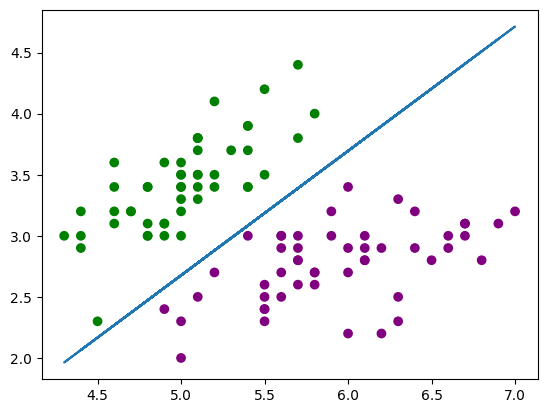

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mat_colors
colors = ['green', 'purple']

# creating scatter plot with its points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=mat_colors.ListedColormap(colors))
print(model.coef_)
print(model.intercept_)
input_x = X[:, 0]

# creating the best fitting line made from the model and plotting
line =- model.coef_[0, 0]/model.coef_[0, 1]*input_x - model.intercept_[0]/model.coef_[0, 1]
plt.plot(input_x, line)

**Task 3:** Change the decision threshold from 0.5 to 0.8 and report your training accuracy. Redraw the figure in task 2 (features and decision boundary). [10 points]

In [8]:
# making predictions based on X
pred_x = model.predict_proba(X)
threshold = 0.8

# looking at the results and determining the accuracy
result = (pred_x[:, 1] > threshold).astype(int)
accuracy = sum(result == y) / len(y)
accuracy

0.89

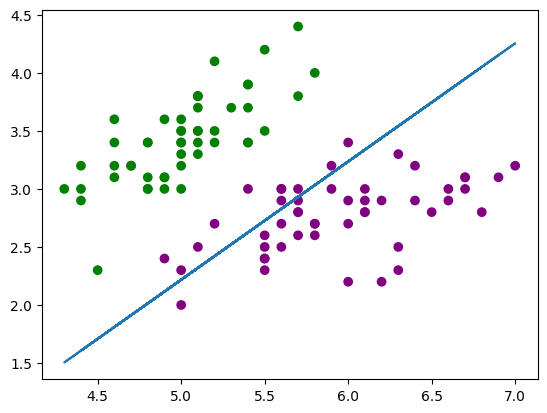

In [9]:
import math
colors = ['green', 'purple']

# creating scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=mat_colors.ListedColormap(colors))
input_x = X[:, 0]

# creating line of best fit
line = - model.coef_[0, 0]/model.coef_[0, 1]*input_x - model.intercept_[0]/model.coef_[0, 1] + math.log(4)/model.coef_[0, 1]
plt.plot(input_x, line)